In [1]:
import torch
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [2]:
# Helper

def find_animal_name(path):
    return path.split("/")[-1].split(".")[0]

def find_names_of_all_animals(paths):

    names = []

    for path in paths:
        animal_name = find_animal_name(path)
        names.append(animal_name)

    return names

def display_image(image_path):
    image = Image.open(image_path)
    plt.imshow(image)


def display_tensor_image(tensor_image):

    # CxHxW to HxWxC and from tensor to numpy array
    image_np = tensor_image.permute(1, 2, 0).numpy()
    
    # Convert numpy array to Pillow Image
    image_pil = Image.fromarray((image_np * 255).astype(np.uint8))
    
    # Display the image using matplotlib
    plt.imshow(image_pil)
    plt.axis('off')
    plt.show()

<IPython.core.display.Javascript object>

## Prepare the data

In [3]:
data_train = "cats_dogs_light/train"
data_test = "cats_dogs_light/test"

<IPython.core.display.Javascript object>

In [4]:
# list comprehension
train_animal_paths = [os.path.join(data_train, f) for f in os.listdir(data_train)]

test_animal_paths = [os.path.join(data_test, f) for f in os.listdir(data_test)]

<IPython.core.display.Javascript object>

In [5]:
print("Length of train_animal_paths: ", len(train_animal_paths))
print("Length of test_animal_paths: ", len(test_animal_paths))

Length of train_animal_paths:  1000
Length of test_animal_paths:  400


<IPython.core.display.Javascript object>

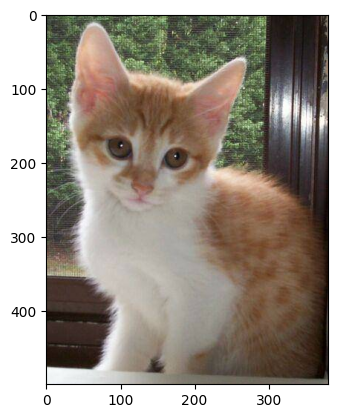

<IPython.core.display.Javascript object>

In [6]:
display_image(train_animal_paths[0])

In [7]:
train_animal_names = [find_animal_name(path) for path in train_animal_paths]

test_animal_names = [find_animal_name(path) for path in test_animal_paths]

<IPython.core.display.Javascript object>

In [8]:
# Write now we have the data as well as the ground truth for the data

<IPython.core.display.Javascript object>

## Create a PyToch Dataloader

In [9]:
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

<IPython.core.display.Javascript object>

In [10]:
class CatDogDataset(Dataset):

    # like a constructor in c++
    def __init__(self, path_list, name_list):
            
            self.path_list = path_list
            self.name_list = name_list

            label_mapping = {"cat": 0, "dog": 1}

            self.label_list = [label_mapping[name] for name in name_list]

    
    def __len__(self):
        return len(self.path_list)
    
    def __getitem__(self, idx):

        image_path = self.path_list[idx]
        label = self.label_list[idx]
        
        # Load the image
        image = Image.open(image_path).convert("RGB")
        image = image.resize((224, 224))
        
        # convert to numpy array
        image = np.array(image)

        # normalize the image from 0-255 to 0-1
        image = image / 255.0

        # pillow: H x W x C
        # pytorch: C x H x W
        
        # reshape image for pytorch
        image = torch.tensor(image).permute(2, 0, 1).float()
        label = torch.tensor(label).long()

        return image, label

        # afterwe put into dataloader
        # [image1, image2,.... image32], [label1, label2, ... label32]

<IPython.core.display.Javascript object>

In [11]:
train_dataset = CatDogDataset(train_animal_paths, train_animal_names)

print("Length of train_dataset: ", len(train_dataset))

Length of train_dataset:  1000


<IPython.core.display.Javascript object>

In [12]:
test_dataset = CatDogDataset(test_animal_paths, test_animal_names)
print("Length of test_dataset: ", len(test_dataset))

Length of test_dataset:  400


<IPython.core.display.Javascript object>

In [13]:
animal_photo, animal_name = train_dataset[0]
animal_name

tensor(0)

<IPython.core.display.Javascript object>

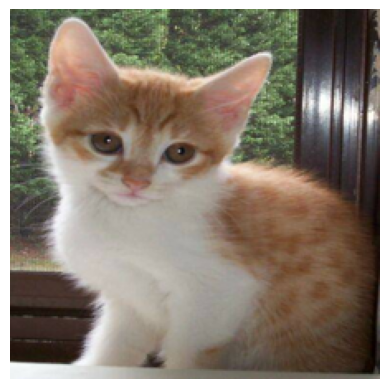

<IPython.core.display.Javascript object>

In [14]:
display_tensor_image(animal_photo)

### DataLoader

In [15]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

<IPython.core.display.Javascript object>

In [16]:
a = iter(train_dataloader)
b = next(a)

<IPython.core.display.Javascript object>

In [17]:
animals = b[0]

animal_names = b[1]

<IPython.core.display.Javascript object>

In [18]:
len(animals)

32

<IPython.core.display.Javascript object>

In [19]:
len(animal_names)

32

<IPython.core.display.Javascript object>

In [20]:
animals[0]

tensor([[[0.9765, 0.9765, 0.9765,  ..., 0.9882, 0.9882, 0.9882],
         [0.9765, 0.9765, 0.9765,  ..., 0.9882, 0.9882, 0.9882],
         [0.9765, 0.9765, 0.9765,  ..., 0.9882, 0.9882, 0.9882],
         ...,
         [0.9882, 0.9882, 0.9882,  ..., 0.9882, 0.9882, 0.9882],
         [0.9882, 0.9882, 0.9882,  ..., 0.9882, 0.9882, 0.9882],
         [0.9882, 0.9882, 0.9882,  ..., 0.9882, 0.9882, 0.9882]],

        [[0.9725, 0.9725, 0.9725,  ..., 0.9804, 0.9804, 0.9804],
         [0.9725, 0.9725, 0.9725,  ..., 0.9804, 0.9804, 0.9804],
         [0.9725, 0.9725, 0.9725,  ..., 0.9804, 0.9804, 0.9804],
         ...,
         [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
         [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
         [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804]],

        [[0.9647, 0.9647, 0.9647,  ..., 0.9843, 0.9843, 0.9843],
         [0.9647, 0.9647, 0.9647,  ..., 0.9843, 0.9843, 0.9843],
         [0.9647, 0.9647, 0.9647,  ..., 0.9843, 0.9843, 0.

<IPython.core.display.Javascript object>

In [21]:
animal_names[31]

tensor(0)

<IPython.core.display.Javascript object>

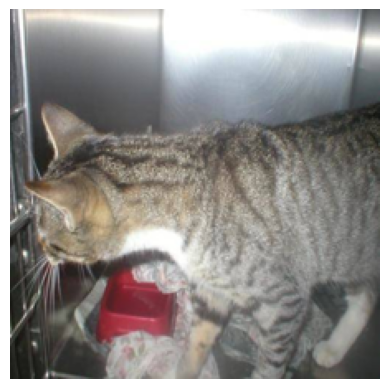

<IPython.core.display.Javascript object>

In [22]:
display_tensor_image(animals[31])

## Create a PyTorch Model

In [23]:
class CNN(nn.Module):

    def __init__(self, num_of_input_channels, num_of_classes, dropout_prob=0.2):
        super().__init__()

        # Convolutional layers
        self.conv = nn.Sequential(
            # conv layer 1
            nn.Conv2d(num_of_input_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # conv layer 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        # Dense layers
        self.dense = nn.Sequential(
            nn.Linear(64*56*56, 128),
            nn.ReLU(),
            nn.Dropout(dropout_prob),
        )

        # Output layer
        self.out = nn.Linear(128, num_of_classes)
    
    def forward(self, x):
        x = self.conv(x)

        x = x.view(x.size(0), -1)

        x = self.dense(x)
        x = self.out(x)

        return x

<IPython.core.display.Javascript object>

In [24]:
data = torch.randn(32, 3, 224, 224)

model = CNN(3, 2)

<IPython.core.display.Javascript object>

In [25]:
# pass the data through the model: forward pass

output = model(data)

print(output.shape)

torch.Size([32, 2])


<IPython.core.display.Javascript object>

In [26]:
class ColorHistogram:
    """
    This is a dummy class for color histogram feature extraction
    """

    def __init__(self, image_path):
         # Load the image
        image = Image.open(image_path).convert("RGB")
        image = image.resize((224, 224))
        
        # convert to numpy array
        image = np.array(image)

        # normalize the image from 0-255 to 0-1
        image = image / 255.0

        self.image = image

    def get_thisimage_features(self):
        return self.image

<IPython.core.display.Javascript object>

In [27]:
class CatDogDataset(Dataset):

    # like a constructor in c++
    def __init__(self, path_list, name_list):
            
            self.path_list = path_list
            self.name_list = name_list

            label_mapping = {"cat": 0, "dog": 1}

            self.label_list = [label_mapping[name] for name in name_list]

    
    def __len__(self):
        return len(self.path_list)
    
    def __getitem__(self, idx):

        image_path = self.path_list[idx]
        label = self.label_list[idx]
        
        # Load the image
        image = Image.open(image_path).convert("RGB")
        image = image.resize((224, 224))
        
        # convert to numpy array
        image = np.array(image)

        # normalize the image from 0-255 to 0-1
        image = image / 255.0

        # pillow: H x W x C
        # pytorch: C x H x W
        
        # reshape image for pytorch
        image = torch.tensor(image).permute(2, 0, 1).float()
        label = torch.tensor(label).long()

        # create histogram of the image
        hist = ColorHistogram(image_path)
        hist = hist.get_thisimage_features()

        hist = hist.permute(2, 0, 1).float()

        return image, hist, label

        # afterwe put into dataloader
        # [image1, image2,.... image32], [label1, label2, ... label32]

<IPython.core.display.Javascript object>

In [28]:
for epoch in epochs:

    for image, hist, label in enumerate(train_dataloader):

        # forward pass
        output = model(image)

        # compute loss
        loss = loss_function(output, label)

        # backward pass
        loss.backward()

        # update weights
        optimizer.step()
   
        # zero the gradients
        optimizer.zero_grad()

NameError: name 'epochs' is not defined

<IPython.core.display.Javascript object>

In [29]:
class CombinedCNN(nn.Module):
    def __init__(self, num_of_input_channels, num_of_classes, num_embeddings=1000, embedding_dim=128, dropout_prob=0.2):
        super(CombinedCNN, self).__init__()

        # Embedding layer
        self.embedding = nn.Embedding(num_embeddings, embedding_dim)

        # Convolutional layers
        self.conv = nn.Sequential(
            # conv layer 1
            nn.Conv2d(num_of_input_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # conv layer 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        # Dense layers
        self.dense = nn.Sequential(
            nn.Linear(64*56*56 + embedding_dim, 128), # 64*56*56 from CNN, and embedding_dim from the embedding
            nn.ReLU(),
            nn.Dropout(dropout_prob),
        )

        # Output layer
        self.out = nn.Linear(128, num_of_classes)
    
    def forward(self, x, category):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        
        # Use the embedding layer
        category_embedded = self.embedding(category)
        
        # Combine the CNN output and the embedded category
        x = torch.cat([x, category_embedded], dim=1)

        x = self.dense(x)
        x = self.out(x)
        return x


<IPython.core.display.Javascript object>